In [1]:
%reload_ext autoreload
%autoreload 1
import torch 
import sys
sys.path.append('..')
from torch import nn 
from torch.nn import functional as F
from torch import optim
from utils.loader import load,PairSetMNIST,Training_set,Test_set, Training_set_split,Validation_set
from torch.utils.data import Dataset, DataLoader
from models.Le_Net import  LeNet_sharing, train_Le_Net_Weight_Sharing
from models.Inception_Net import Inception_block, conv_block, Google_Net, Auxiliary_loss, train_inception
from utils.evaluate_ws import compute_metrics, validate_model, evaluate_model, grid_search
from matplotlib import pyplot as plt
import torch.cuda as cuda 
from utils.plot import boxplot

In [2]:
# parameters to optimize
drop_prob = [0.1,0.2]
hidden_layers = [50, 100]

# number of seeds to perform
seeds = [19, 123, 1234] 

train_results, test_losses, test_accuracies = grid_search(LeNet_sharing,train_Le_Net_Weight_Sharing, drop_prob, hidden_layers, seeds, mini_batch_size=100, optimizer =optim.Adam,criterion = nn.CrossEntropyLoss(), n_epochs=40, eta=1e-3, lambda_l2 = 0,rotate = False,translate=False,swap_channel = False,GPU=False)

prob : 0.1, nb_hidden : 50 (n= 0)
prob : 0.1, nb_hidden : 50 (n= 1)
prob : 0.1, nb_hidden : 50 (n= 2)
prob : 0.1, nb_hidden : 100 (n= 0)
prob : 0.1, nb_hidden : 100 (n= 1)
prob : 0.1, nb_hidden : 100 (n= 2)
prob : 0.2, nb_hidden : 50 (n= 0)
prob : 0.2, nb_hidden : 50 (n= 1)
prob : 0.2, nb_hidden : 50 (n= 2)
prob : 0.2, nb_hidden : 100 (n= 0)
prob : 0.2, nb_hidden : 100 (n= 1)
prob : 0.2, nb_hidden : 100 (n= 2)
Best mean validation accuracy on 3 seeds : 84.50%, std = 0.50 with: dropout rate = 0.20 and nb_hidden = 100.00


In [18]:
idx = torch.where(validation_grid == validation_grid.max())

if len(idx[0]) >=2:
    idx=idx[0]

opt_prob = drop_prob[idx[0].item()]
opt_hidden_layer = hidden_layers[idx[1].item()]

print('Best mean validation accuracy on {:d} seeds : {:.2f}%, with: dropout rate = {:.2f} and nb_hidden = {:.2f}'.format(len(seeds), validation_grid[idx[0].item(), idx[1].item()], opt_prob, opt_hidden_layer))

Best mean validation accuracy on 3 seeds : 82.67%, with: dropout rate = 0.20 and nb_hidden = 100.00


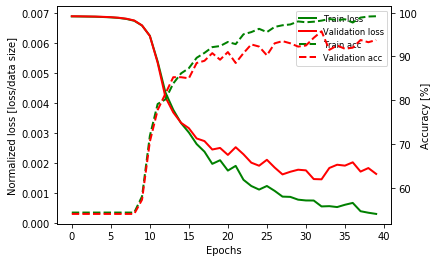

Seed 0 | Test Loss: 0.0044 | Test Accuracy: 86.10%



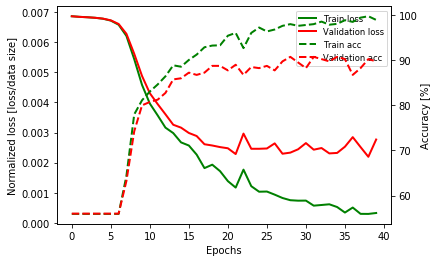

Seed 1 | Test Loss: 0.0050 | Test Accuracy: 87.30%



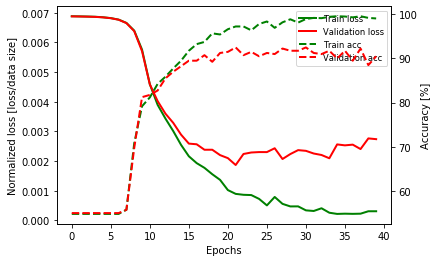

Seed 2 | Test Loss: 0.0057 | Test Accuracy: 84.50%



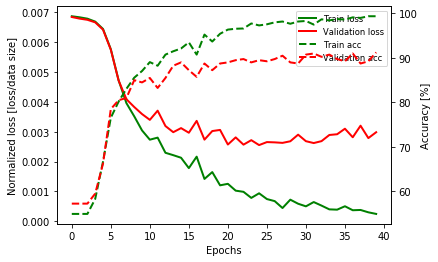

Seed 3 | Test Loss: 0.0048 | Test Accuracy: 86.20%



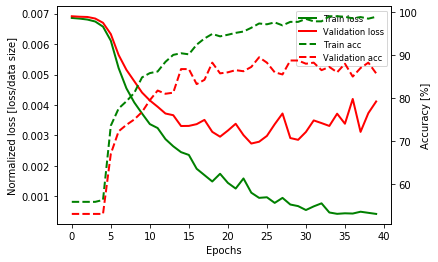

Seed 4 | Test Loss: 0.0067 | Test Accuracy: 83.40%



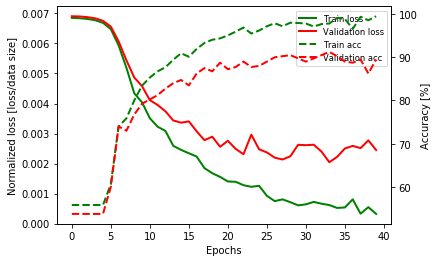

Seed 5 | Test Loss: 0.0047 | Test Accuracy: 85.60%



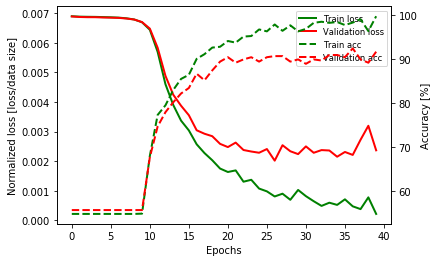

Seed 6 | Test Loss: 0.0048 | Test Accuracy: 85.70%



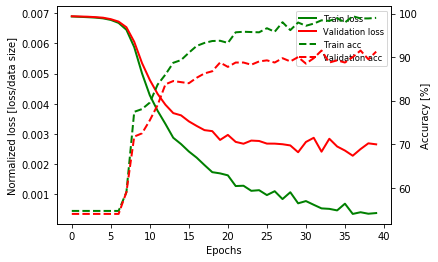

Seed 7 | Test Loss: 0.0044 | Test Accuracy: 85.30%



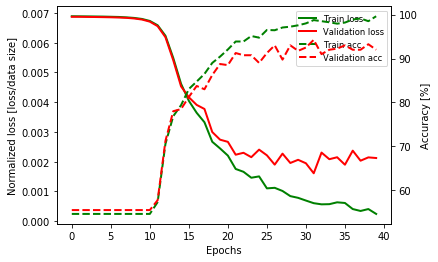

Seed 8 | Test Loss: 0.0046 | Test Accuracy: 84.80%



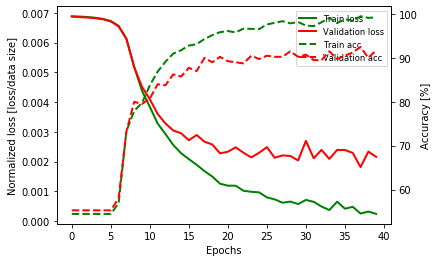

Seed 9 | Test Loss: 0.0046 | Test Accuracy: 86.60%



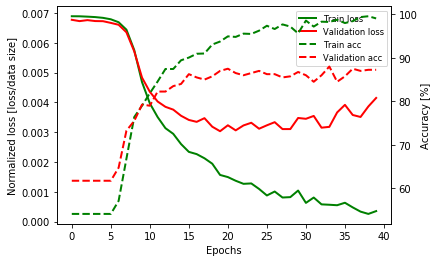

Seed 10 | Test Loss: 0.0049 | Test Accuracy: 87.30%



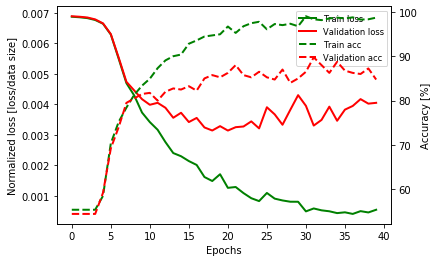

Seed 11 | Test Loss: 0.0058 | Test Accuracy: 82.70%



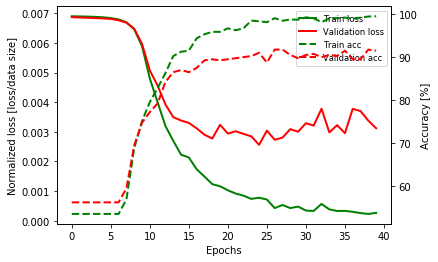

Seed 12 | Test Loss: 0.0050 | Test Accuracy: 84.30%



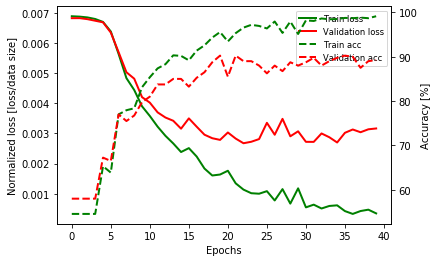

Seed 13 | Test Loss: 0.0056 | Test Accuracy: 83.30%



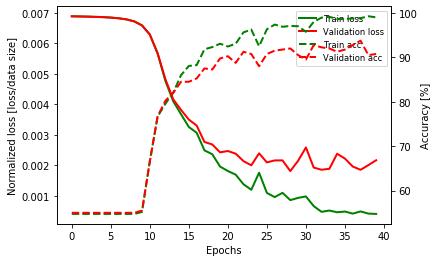

Seed 14 | Test Loss: 0.0043 | Test Accuracy: 84.60%



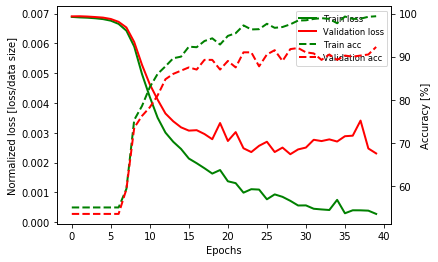

Seed 15 | Test Loss: 0.0041 | Test Accuracy: 87.00%



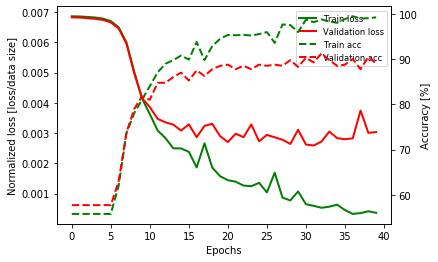

Seed 16 | Test Loss: 0.0047 | Test Accuracy: 87.70%



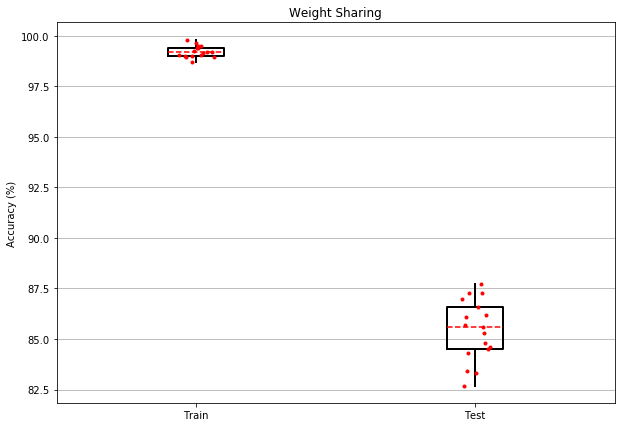

In [2]:
# evaluate model on 10 trials for final results 

seeds = [3, 4, 452, 2345, 1234, 2134, 12345, 12377, 56765, 567776, 234, 1234, 1324543, 1234 , 345, 213456, 21345] # random seeds

train_results, test_losses, test_accuracies = evaluate_model(LeNet_sharing,train_Le_Net_Weight_Sharing, seeds, rotate=False, translate=False, swap_channel=True, GPU=True)

data = torch.stack([train_results[:,1,39], test_accuracies])  # group data for boxplot
boxplot(data)